<a href="https://colab.research.google.com/github/VitaLiNaLi/HW_Visual/blob/main/HW_Visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px

In [ ]:
churn_data = pd.read_csv('/content/churn1.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

In [ ]:
pie_data = churn_data.groupby('Exited', as_index=False).count()
fig = px.pie(pie_data, values='RowNumber', names=['лояльный клиент','ушедший клиент'], title='Cоотношение ушедших и лояльных клиентов')
fig.show()

вывод; ушло только 20,4% от суммарного количества клиентов банка, пока сложно сказать много это или мало. необходим дальнейший анализ

9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

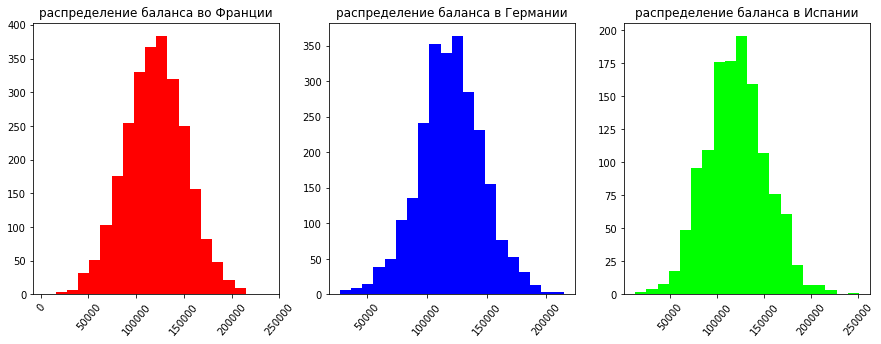

In [ ]:
France_data = churn_data[churn_data['Geography'] == 'France']
France_data = France_data[France_data['Balance']>=2500]
France_data_male = France_data[France_data['Gender']=='Male']
France_data_female = France_data[France_data['Gender']=='Female']
Germany_data = churn_data[churn_data['Geography'] == 'Germany']
Germany_data = Germany_data[Germany_data['Balance']>=2500]
Spain_data = churn_data[churn_data['Geography'] == 'Spain']
Spain_data = Spain_data[Spain_data['Balance']>=2500]

#визуализация систем координат
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

#гистограмма
axes[0].hist(x=France_data['Balance'],
             label=['количество человек в категории'], 
             color='red', bins = 20)
axes[0].set_title('распределение баланса во Франции');
axes[0].xaxis.set_tick_params(rotation=50)



#гистограмма
axes[1].hist(x=Germany_data['Balance'],
             label=['количество человек в категории'], 
             color='blue', bins = 20)
axes[1].set_title('распределение баланса в Германии');
axes[1].xaxis.set_tick_params(rotation=50)


#гистограмма
axes[2].hist(x=Spain_data['Balance'],
             label=['количество человек в категории'], 
             color='lime', bins = 20)
axes[2].set_title('распределение баланса в Испании');
axes[2].xaxis.set_tick_params(rotation=50)



доля группы 2500+ 0.6383


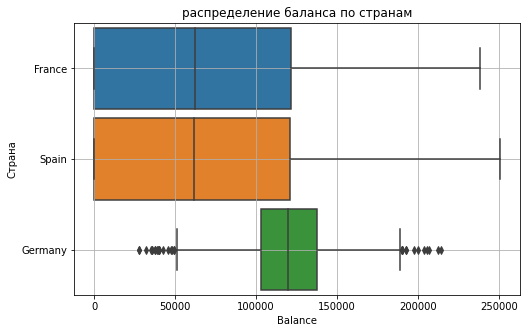

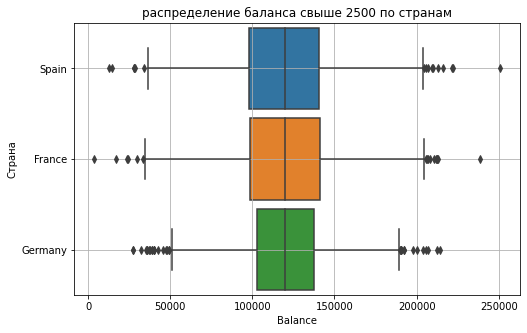

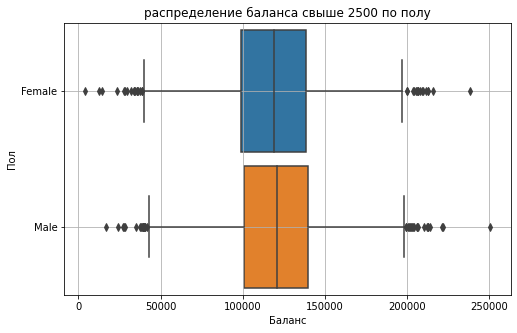

In [ ]:
#fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 4))

fig = plt.figure(figsize=(8, 5))

boxplot = sns.boxplot(
    data=churn_data,
    y='Geography',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('распределение баланса по странам');
boxplot.set_xlabel('Balance');
boxplot.set_ylabel('Страна');
boxplot.grid()

churn_data_2500=churn_data[churn_data['Balance']>=2500]
fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(
    data=churn_data_2500,
    y='Geography',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('распределение баланса свыше 2500 по странам');
boxplot.set_xlabel('Balance');
boxplot.set_ylabel('Страна');
boxplot.grid()

churn_data_2500=churn_data[churn_data['Balance']>=2500]
fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(
    data=churn_data_2500,
    y='Gender',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('распределение баланса свыше 2500 по полу');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Пол');
boxplot.grid()




print('доля группы 2500+', churn_data_2500['Balance'].count()/churn_data['Balance'].count())

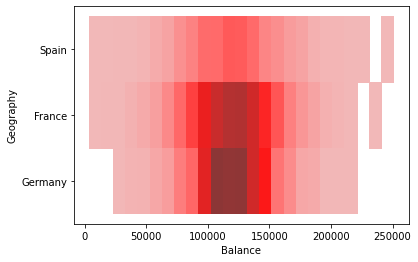

In [ ]:
sns.histplot(
    data= churn_data_2500,
    x='Balance',
    y='Geography',
    bins=25,
    color='red',
);

Вывод; Исследование проведено в разрезе стран. распределение категорий по статье "Баланс" похоже на нормальное во всех трех странах, однако, при этом  во Франции и Испании - менее сконцентрированное распределение, чем в Германии. во Франции и Испании наблюдаются наиболее значительные выбросы. обращает на себя внимание тот факт, что в диапазоне "баланс более 2500" наблюдается один уровень медианы 120 000 eur. однако, я не могу не подчеркнуть тот факт, что на долю группы "баланс свыше 2500" приходится только 63% совокупного объема клиентов. распределение объего пула клиентов имеет более существенные отличия (значительно более низкая медиана во Франции и в Испании). то в плане работы с клиентами сегмента "2500+" в Германии следует рассмотреть более индивидуальный подход к данным клиентам, т.к. концентрация капитала выше.

9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

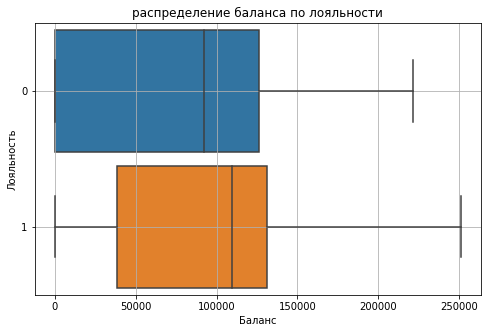

In [ ]:

fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('распределение баланса по лояльности');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

как следует из представленных графиков уходили в среднем клиенты с более высоим медианным значением баланса. из этого можно сделать предположение, что или линейка проуктов не включает продукты для состоятельных клиентов, или эти продукты недостаточно качественные или доходные. предположу, что будет верным провести маркетинговое исследование путем бесед клиентских менеджеров с состоятельными клиентами, чтобы уточнить причины ухода и скорректировать продуктовую линейку банка

9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

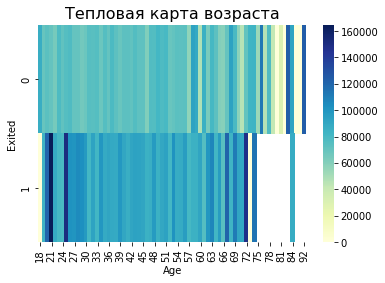

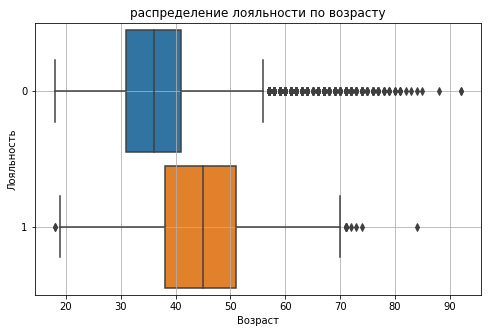

In [ ]:
pivot =churn_data.pivot_table(
    values='Balance',
    columns='Age',
    index='Exited',
)
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта возраста', fontsize=16);

fig = plt.figure(figsize=(8, 5))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Age',
    orient='h',
    width=0.9
)
boxplot.set_title('распределение лояльности по возрасту');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

Вывод: следует отметить, что склонны к меньшей лояльности клиенты в возрастной категории 35-50+(медиана  45 лет). возрастной портрет лояльного клиента - 30-42 года (медианное значение - 35 лет). при этом выбросы случались в основном в возрасте 70+ в категории ушедших клиентов. можно предположить, что сложные процессы банка многими зрелыми клиентами не поддерживаются (например, мобильные сервисы и он-лайн банк), либо сервис не соответсвует их представлениям о качестве. так же следует отдельно отметить, что согласно тепловой карте (по балансу), к меньшей лояльности склонны обеспеченные клиенты с балансом +60тыс евро.
    однако, выбросы в категории "лояльные клиенты" так же происходят в зрелом возрасте 55+, при этом их больше и нет очевидной связи с состоятельностью клиента.
    то для повышения лояльности необходимо провести работу с клиентами в категории 35-45 для уточнения их пожеланий по продуктам банка.

9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [ ]:
mean_data = churn_data.groupby(
    by=['CreditScore','Exited'],
    as_index=False
)[['EstimatedSalary', 'Balance']].mean()
mean_data['ESB']=mean_data['Balance']+mean_data['EstimatedSalary']
mean_data.head()

,CreditScore,Exited,EstimatedSalary,Balance,ESB
0,350,1,145503.35,74701.906,220205.256
1,351,1,169621.69,163146.460,332768.150
2,358,1,141959.11,143542.360,285501.470
3,359,1,146955.71,128747.690,275703.400
4,363,1,100615.14,146098.430,246713.570


Text(0, 0.5, 'предполагаемая зарплата')

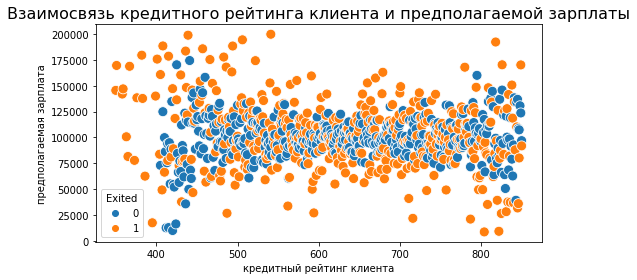

In [ ]:


fig = plt.figure(figsize=(8, 4))

scatterplot = sns.scatterplot(
    data=mean_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='Exited',
    s=100,

)
scatterplot.set_title('Взаимосвязь кредитного рейтинга клиента и предполагаемой зарплаты', fontsize=16)
scatterplot.set_xlabel('кредитный рейтинг клиента')
scatterplot.set_ylabel('предполагаемая зарплата')

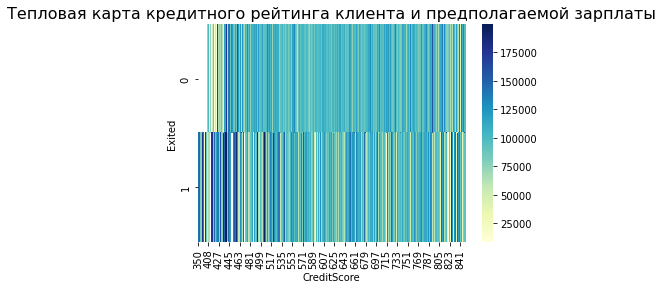

In [ ]:
pivot =mean_data.pivot_table(
    values='EstimatedSalary',
    columns='CreditScore',
    index='Exited'
)
heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта кредитного рейтинга клиента и предполагаемой зарплаты', fontsize=16);

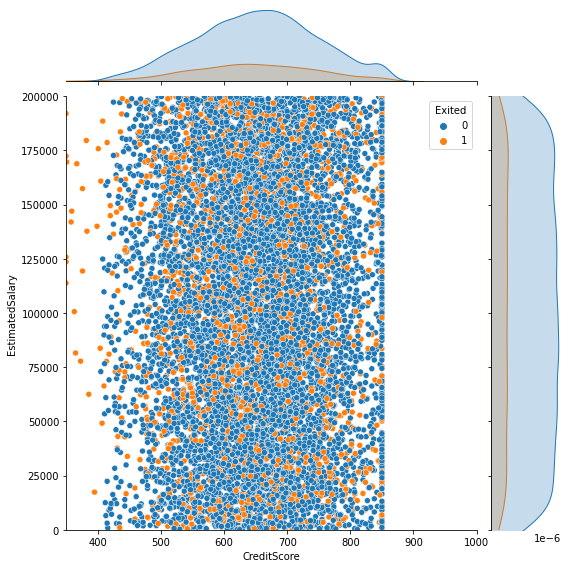

In [ ]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    xlim = (350, 1000),
    ylim = (0, 200000),
    height=8,
)

Вывод: достаточно сложно увидеть взаимосвязь рейтинга и предположительной заработной платы. в целях более компактного визуального представления данные сгруппированы по рейтингу с указанием средней предположительной заработной платы. И визуально можно указать на следующую тенденцию:1)распределение рейтинг-зп очень сильно отличается у лояльных и нелояльных клиентов 2) у лояльных клиентов можно увидеть на scatterplot некоторую видимость полиномиальной зависимости 3) у нелояльных клиентов какой то связи не видно
можно предположить, что банку следует критически посмотреть на свою систему крединого рейтинга, т.к. видимо,  одним их факторов недовольства нелояльных клиентов могла быть непрозрачность оценки.


9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

In [ ]:
gender_data = churn_data.groupby(
    by=['Gender'],
    as_index=False
)[['Exited']].mean()

gender_data.head()
 

,Gender,Exited
0,Female,0.250715
1,Male,0.164559


In [ ]:
#строим график
fig = px.bar(
    data_frame=gender_data, #датафрейм
    x="Gender", #ось x
    y="Exited", #ось y
    color='Gender', #расцветка в зависимости от Gender
    orientation='v', #ориентация графика
    height=500, #высота
    width=700, #ширина
    title='Доля ушедших клиентов в зависимости от пола' #заголовок
)

#отображаем его
fig.show()


вывод: доля нелояльных женщин на 8,5_% превышает долю нелояльных мужчин. Данное обстоятельство требует дополнительного анализа (сравнение в целом по рынку), и если тенденция не является общерыночной, то следует дополнительно исследовать гендерные причины оттока клиентов(некорректная рекламная компания, некорректные паттерны поведения сотрудников, некорректная продуктовая ниша)

9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [ ]:
NumOfProducts_data = churn_data.groupby(
    by=['NumOfProducts'],
    as_index=False
)[['Exited']].mean()

NumOfProducts_data.head()

,NumOfProducts,Exited
0,1,0.277144
1,2,0.075817
2,3,0.827068
3,4,1.000000


In [ ]:
#строим график
fig = px.bar(
    data_frame=NumOfProducts_data, #датафрейм
    x="NumOfProducts", #ось x
    y="Exited", #ось y
    color='NumOfProducts', #расцветка в зависимости от NumOfProducts
    orientation='v', #ориентация графика
    height=500, #высота
    width=700, #ширина
    title='Доля ушедших клиентов в зависимости от количества продуктов' #заголовок
)

#отображаем его
fig.show()


вывод; очень любопытное распределение. минимальная доля нелояльных клиентов в группе "2 продукта"(8%). вероятно, что для группы "1 продукт" психологически не представляется сложным смена банка, поэтому эта группа по доле нелояльных клиентов выше(28%). а  по мере роста количества продуктов доля нелояльных клиентов серьезно растет и в сегменте "4 продукта" составляет 100%(!). подчеркну, что в данном сегменте 60 клиентов(т.е. \то не ежиничный факт). из указанной выше информации можно сделать вывод, что для клиента, который заинтересован с объемном сотрудничестве с банком - данный банк не подходит. по причине плохой программы лояльности? критически неконкурентным условиям части продуктов? следует дополнительно критично посмотреть на совокупную привлекательность комплексного обслуживания данного банка в сравнении с конкурентами и найти точки роста.

9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [ ]:
IsActiveMember_data = churn_data.groupby(
    by=['IsActiveMember'],
    as_index=False
)[['Exited']].mean()

IsActiveMember_data.head()

,IsActiveMember,Exited
0,0,0.268509
1,1,0.142691


In [ ]:
#строим график
fig = px.bar(
    data_frame=IsActiveMember_data, #датафрейм
    x="IsActiveMember", #ось x
    y="Exited", #ось y
    color='IsActiveMember', #расцветка в зависимости от NumOfProducts
    orientation='v', #ориентация графика
    height=500, #высота
    width=700, #ширина
    title='Доля ушедших клиентов в зависимости от активности' #заголовок
)

#отображаем его
fig.show()

вывод; среди неактивных клиентов банка доля нелояльных оказалась существенно выше - 27% против 14% в группе активных. полагаю, что тк неактивный клиента выразил активную позицию - закрыл продукты в банке, то это связано либо в целом с желанием уйти из банковской сферы (можно сравниить с цифрой в целом по рынку) либо с получением активного интересного предложения от банков конкурентов. необходимо провести работу как в целом (посмотреть, какие дополнительные бонусы получают клиенты переходя в другой банк), так и в частном (теплые звонки данной группы с каким по приятным предложением в случае активизации, предложение подбирается по итогам первой части исследования)

9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [ ]:
#фильтруем таблицу по странам
Geography_data = churn_data.groupby(
    by=['Geography'],
    as_index=False
)[['Exited']].mean()



#строим график
fig = px.choropleth(
    data_frame= Geography_data, #датафрейм
    locations="Geography", #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    scope='europe', 
    color="Exited", #от чего зависит цвет
    range_color=[0, 0.5],
    title='Доля ушедших клиентов по странам', #заголовок
    width=700, #ширина
    height=500, #высота
    color_continuous_scale='agsunset' #палитра цветов
)

#отображаем его
fig.show()

вывод; доля нелояльных клиентов Германии(32%) существенно выше, чем в Испании и Франции(16%). сравнивать по странам не совсем корректно, тк не учитываются культурные особенности. но, если средняя величина "мобильности" клиентов в Германии такая же как в Испании и Франции, то мы говорим о более агрессивной конкуренции на этом рынке. Ранее (п2) мы уже обратили внимание, что есть разница в структуре рынка Германии и Испании,Франции.  

9.10 Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

In [ ]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScore_cat'] = churn_data.CreditScore.apply(get_credit_score_cat)
churn_pivot = pd.pivot_table(churn_data, values='Exited',
                           index=['Tenure'],
                        columns=['CreditScore_cat'])

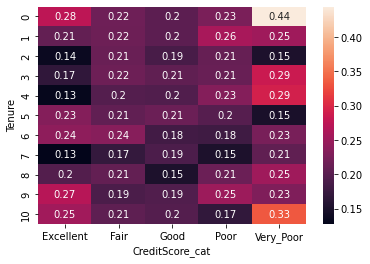

In [ ]:
fig = sns.heatmap(churn_pivot, annot=True)





вывод; Самая высокая доля нелояльных клиентов  наблюдается в сегменте "новый клиент с плохим рейтингом" - 44%, что отражает неспособность банка привлечь этот сегмент за счет депозитных продуктов. при этом, можно предположить, что это свежая тенденция, т.к. аналогично достаточно высок отток из сегмента "клиент с 10 летним опытом с плохим рейтингом". можно предположить, что ранее этот сегмент все устраивало (10 лет они были с банком). так же следует обратить внимание на сегмент с "прекрасным рейтингом" - очень плохим признаком является потеря новых клиентов(28%) и тем более потеря "старых" клиентов 9-10 лет (26-27%). необходимо иссследовать дополнительно куда и по каким причинам они ушли.

ВЫВОДЫ; 1) в среднем банк теряет 20,4% своих клиентов 2) распределение накопительных счетов среди клиентов нормальное, однако концентрация в Германии выше, что следует учитывать при страновом формировании продуктовой линейки 3) у нелояльных клиентов медианное значение баланса накопительного счета выше (120 против 90), т.о. крайне важно проанализировать линейку продуктов для состоятельных клиентов. 4) склонны к меньшей лояльности клиенты в возрастной категории 35-50+(медиана  45 лет) 5) доля нелояльных женщин на 8,5_% превышает долю нелояльных мужчин. Данное обстоятельство требует дополнительного анализа (сравнение в целом по рынку) и корректировку шендерной политики, если показатели не соответствуют рыночном 6) 100% клиентов с 4 продуктами покидают банк, следует очень внимательно проагализировать причины (какие были продукты, что в них не устроило клиентов, что было лучше у конкурентов) 7)среди неактивных клиентов банка доля нелояльных оказалась существенно выше - 27% против 14% в группе активных 8)доля нелояльных клиентов Германии(32%) существенно выше, чем в Испании и Франции(16%) 9)Самая высокая доля нелояльных клиентов  наблюдается в сегменте "новый клиент с плохим рейтингом" - 44%, что отражает неспособность банка привлечь этот сегмент за счет депозитных продуктов. ак же следует обратить внимание на сегмент с "прекрасным рейтингом" - очень плохим признаком является потеря новых клиентов(28%) и тем более потеря "старых" клиентов 9-10 лет (26-27%). необходимо иссследовать дополнительно куда и по каким причинам они ушли.